# Exploratory Data Analysis
---

We now have a clean dataframe representing the stats of almost every NFL player from the last 50 years. Here, we do some data analysis to help inform our modeling decisions. As a fantasy football nerd, I'm also just excited to explore some intricacies of the game.

### Contents:
1. [Which features are most highly correlated with fantasy points scored?](#corr)
1. [How are points distributed by position?](#boxplot)

### Import libraries
---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Load the data
---

In [2]:
df = pd.read_csv('../data/clean.csv')
df.head()

,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,...,two_pt_pass,fantasy_points,fantasy_points_ppr,year,is_qb,is_rb,is_te,is_wr,fantasy_points_next_year,fantasy_points_ppr_next_year
0,Christian McCaffrey,CAR,RB,23,16.0,16.0,0.0,2.0,0.0,0.0,...,0.0,355.0,471.2,2019,0,1,0,0,NaN,NaN
1,Lamar Jackson,BAL,QB,22,15.0,15.0,265.0,401.0,3127.0,36.0,...,0.0,416.0,415.7,2019,1,0,0,0,NaN,NaN
2,Derrick Henry,TEN,RB,25,15.0,15.0,0.0,0.0,0.0,0.0,...,0.0,277.0,294.6,2019,0,1,0,0,NaN,NaN
3,Aaron Jones,GNB,RB,25,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,266.0,314.8,2019,0,1,0,0,NaN,NaN
4,Ezekiel Elliott,DAL,RB,24,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,258.0,311.7,2019,0,1,0,0,NaN,NaN


In [3]:
df.shape

(25080, 32)

In [4]:
df.drop(columns=['fantasy_points_next_year', 'fantasy_points_ppr_next_year'], inplace=True)

## Which features are most highly correlated with fantasy points scored?<a id="corr"></a>
---

We'll look at each position independently, since the correlations are likely to be highly dependent on position.

### Quarterbacks
---

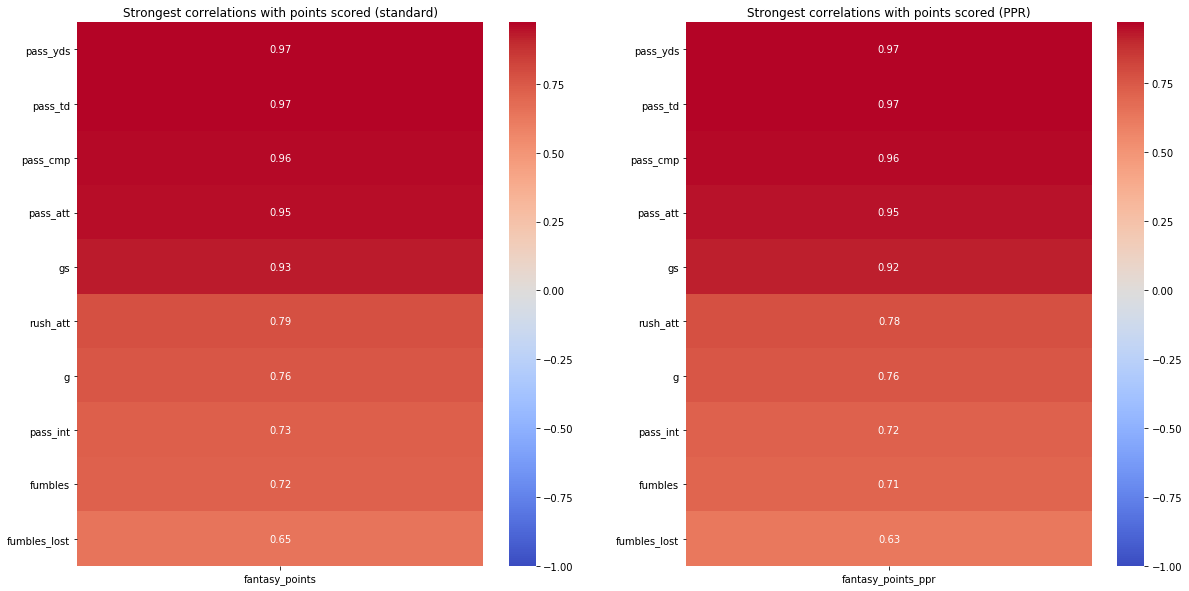

In [5]:
# Get df of all quarterbacks.
qb_df = df.loc[df['is_qb'] == 1, :]

# Create subplots.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create heatmap for standard scoring.
sns.heatmap(qb_df.corr()[['fantasy_points']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                            .sort_values(by='fantasy_points', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[0])

# Create heatmap for ppr scoring.
sns.heatmap(qb_df.corr()[['fantasy_points_ppr']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                                .sort_values(by='fantasy_points_ppr', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[1])

# Make sure features are oriented horizontally.
plt.setp(ax[0].get_yticklabels(), rotation=0)
plt.setp(ax[1].get_yticklabels(), rotation=0)

# Set titles.
ax[0].title.set_text('Strongest correlations with points scored (standard)')
ax[1].title.set_text('Strongest correlations with points scored (PPR)');

There's nothing too surpising here, except for the fact that `fumbles` and `pass_int` are both strongly _positively_ correlated with points scored. This is probably because both serve as indicators of play time. Note that the correlations are almost identical for both standard scoring and PPR scoring, which should be expected, given that quarterbacks don't tend to catch many (or any) passes.

### Runningbacks
---

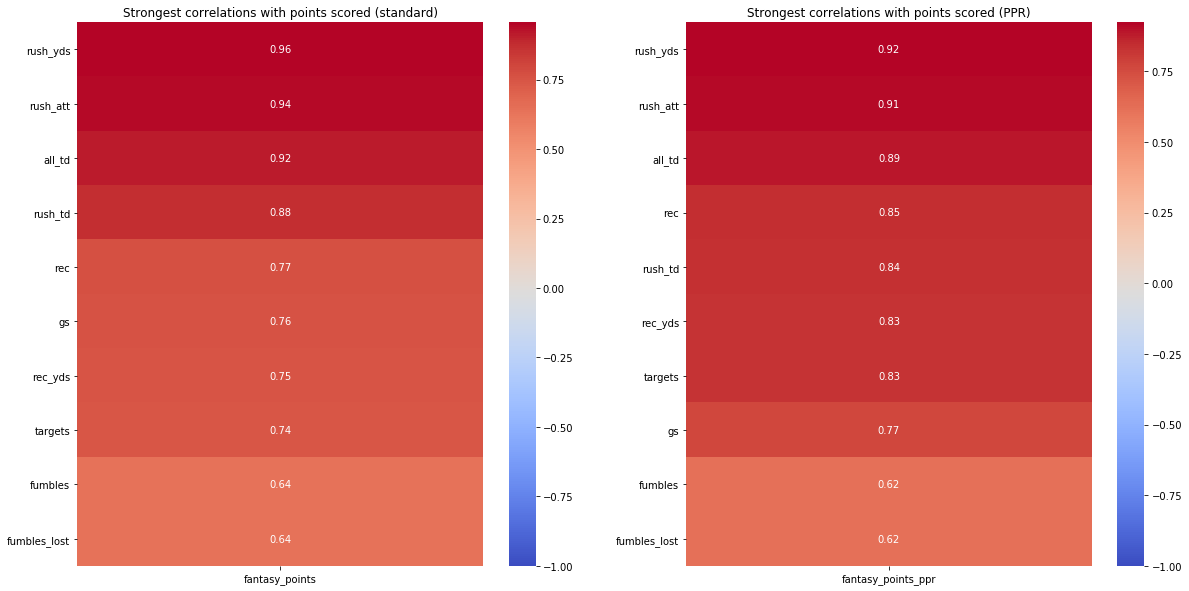

In [6]:
# Get df of all runningbacks.
rb_df = df.loc[df['is_rb'] == 1, :]

# Create subplots.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create heatmap for standard scoring.
sns.heatmap(rb_df.corr()[['fantasy_points']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                            .sort_values(by='fantasy_points', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[0])

# Create heatmap for ppr scoring.
sns.heatmap(rb_df.corr()[['fantasy_points_ppr']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                                .sort_values(by='fantasy_points_ppr', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[1])

# Make sure features are oriented horizontally.
plt.setp(ax[0].get_yticklabels(), rotation=0)
plt.setp(ax[1].get_yticklabels(), rotation=0);

# Set titles.
ax[0].title.set_text('Strongest correlations with points scored (standard)')
ax[1].title.set_text('Strongest correlations with points scored (PPR)')

Again, nothing too surprising here, except for the same effect as observed with quarterbacks where `fumbles` are actually positively correlated with points scored.

### Wide receivers
---

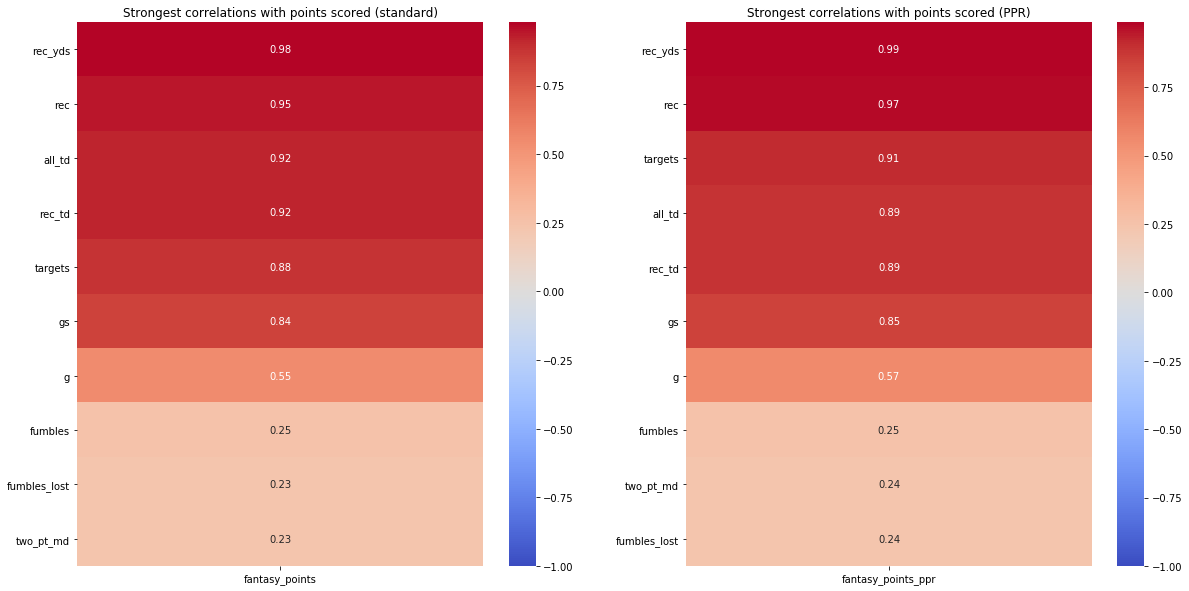

In [7]:
# Get df of all runningbacks.
wr_df = df.loc[df['is_wr'] == 1, :]

# Create subplots.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create heatmap for standard scoring.
sns.heatmap(wr_df.corr()[['fantasy_points']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                            .sort_values(by='fantasy_points', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[0])

# Create heatmap for ppr scoring.
sns.heatmap(wr_df.corr()[['fantasy_points_ppr']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                                .sort_values(by='fantasy_points_ppr', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[1])

# Make sure features are oriented horizontally.
plt.setp(ax[0].get_yticklabels(), rotation=0)
plt.setp(ax[1].get_yticklabels(), rotation=0);

# Set titles.
ax[0].title.set_text('Strongest correlations with points scored (standard)')
ax[1].title.set_text('Strongest correlations with points scored (PPR)')

These graphs confirm a long held suspicion of mine, which is that when picking picking wide receivers, you should look for players who get a large amount of targets (as targets are highly correlated with points scored). We see that `fumbles_lost` are again positively correlated with points scored, but not as dramatically as for the quarterbacks and runningbacks.

### Tight end
---

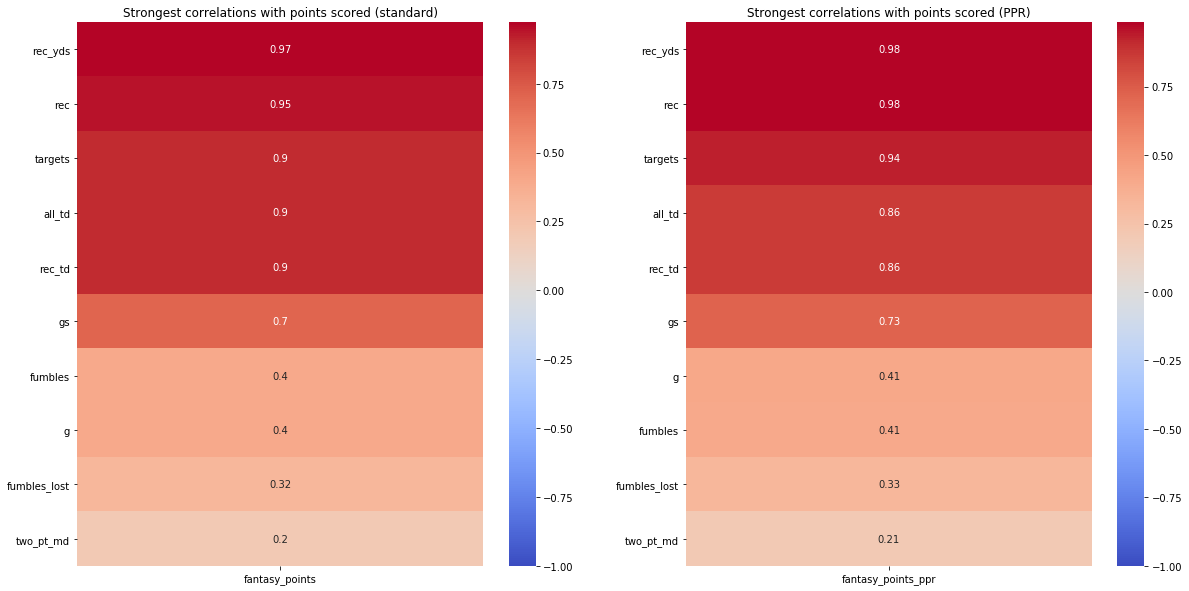

In [8]:
# Get df of all runningbacks.
te_df = df.loc[df['is_te'] == 1, :]

# Create subplots.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create heatmap for standard scoring.
sns.heatmap(te_df.corr()[['fantasy_points']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                            .sort_values(by='fantasy_points', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[0])

# Create heatmap for ppr scoring.
sns.heatmap(te_df.corr()[['fantasy_points_ppr']].drop(['fantasy_points', 'fantasy_points_ppr'])
                                                .sort_values(by='fantasy_points_ppr', ascending=False)[:10],
            cmap='coolwarm',
            vmin=-1,
            annot=True,
            ax=ax[1])

# Make sure features are oriented horizontally.
plt.setp(ax[0].get_yticklabels(), rotation=0)
plt.setp(ax[1].get_yticklabels(), rotation=0);

# Set titles.
ax[0].title.set_text('Strongest correlations with points scored (standard)')
ax[1].title.set_text('Strongest correlations with points scored (PPR)')

These correlations largely mirror the wide receiver correlations, which is perhaps to be expected, given that both position groups could be more broadly labeled as "pass catchers".

# How are points distributed by position?<a id="boxplot"></a>
---

### `fantasy_points`
---

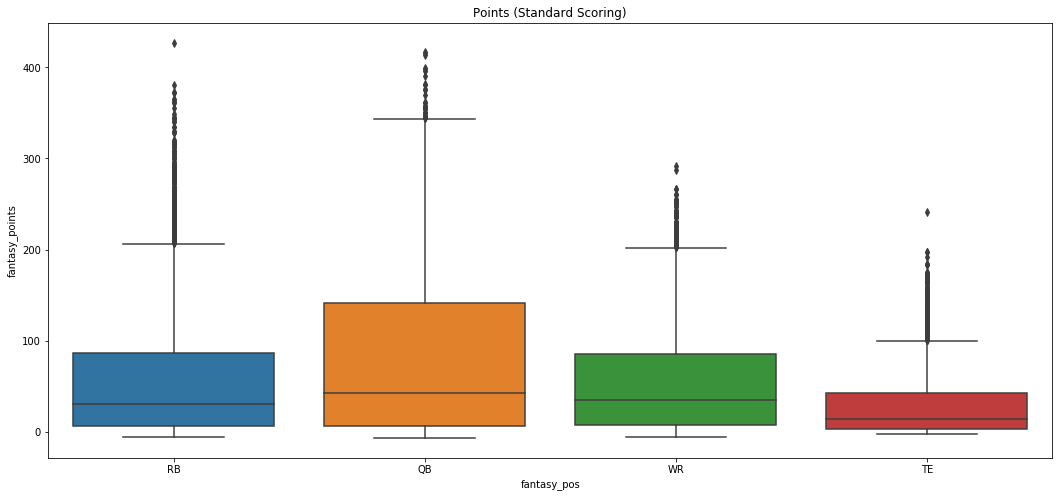

In [9]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='fantasy_pos', y='fantasy_points', data=df)
plt.title('Points (Standard Scoring)');

### `fantasy_points_ppr`
---

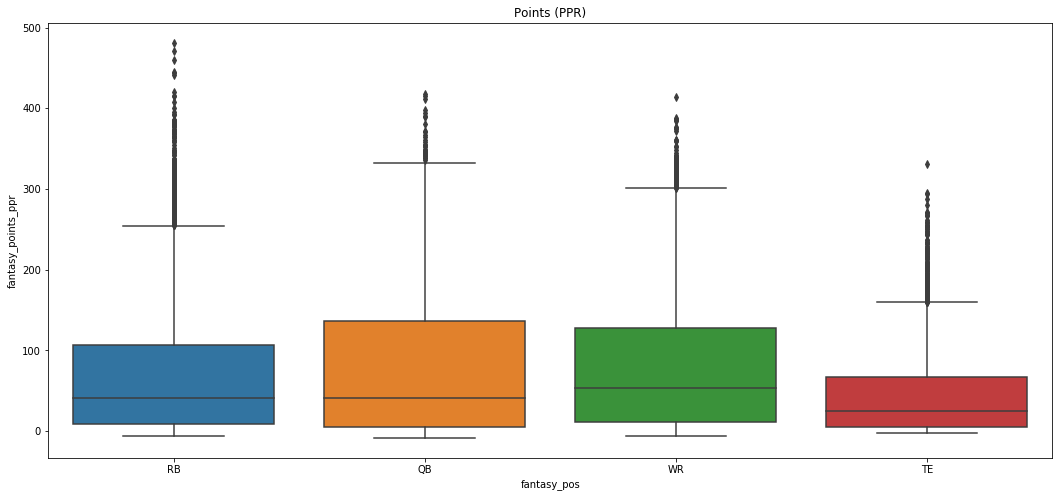

In [10]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='fantasy_pos', y='fantasy_points_ppr', data=df)
plt.title('Points (PPR)');